### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! 
1. Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.
2. Для каждого нелинейного, где есть указанные проблемы, надо привести демонстрацию решения вашим методом. Без этой демонстрации считается, что обработчик соответствующей проблемы не реализован и не оценивается.

In [1]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        #print(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def cool_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    
    # Для обнаружения биений сохраняем историю итераций
    prev_x = None
    prev_prev_x = None
    

    for i in range(30):
        iteration += 1        
        fx = func(x)

        # 0) Случай попадания
        # Проверка на достижение точности
        if abs(fx) < tol:
            sol = x
            dxs.append(0.0)
            return [sol, iteration, dxs]
        
        # 1) Нулевая производная
        ## Масштаб для конечных разностей
        eps = np.finfo(float).eps # машинный эпсилон
        h   = np.sqrt(eps) * max(1.0, abs(x)) 
        ## Защита от нулевой/малой производной — оценка центральной разностью
        dfx = dfunc(x)
        if not np.isfinite(dfx) or abs(dfx) < 1e-14:
            fph = func(x + h)
            fmh = func(x - h)
            dfx = (fph - fmh) / (2*h)
            if abs(dfx) < 1e-14 or not np.isfinite(dfx):
                ## Минимальный сдвиг для точки, чтобы покинуть «плоскую» точку
                x = x + h
                dxs.append(abs(h))
                if abs(h) < tol:
                    sol = x
                    return [sol, iteration, dxs]
                continue

        dx = -fx/dfx

        # 2) Кратные корни (Шрёдер)
        h_m = max(1e-8, 1e-8 * abs(x))                 # отдельный шаг для конечных разностей
        # оценка второй производной
        dfx_plus  = dfunc(x + h_m)
        dfx_minus = dfunc(x - h_m)
        d2f_approx = (dfx_plus - dfx_minus) / (2.0 * h_m)
        # оценка кратности m по Шрёдеру (с лёгкими фильтрами для устойчивости)
        if np.isfinite(dfx) and abs(dfx) > 1e-14:
            mu = (fx * d2f_approx) / (dfx * dfx)
            if np.isfinite(mu) and 0.0 <= mu < 0.95:   # применяем только в разумной зоне
                m = 1.0 / (1.0 - mu)
                m = min(max(m, 1.0), 5.0)             # клип как у тебя
            else:
                m = 1.0
        else:
            m = 1.0
        step = -m * fx / dfx
        dx = step                                      # чтобы ниже логировался именно модифицированный шаг

        dxs.append(abs(dx))
        x = x + dx
        #print(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

# Нулевая производная

Оценка центральной разностью:

$f'(x) = \frac{f(x+h) - f(x)}{h}$

Ошибка:

$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{1}{2}f''(x)h + o(h^2)$

$E(h) \approx E_{trunc}(h) + E_{round}(h) = ah + \frac{b\cdot \varepsilon}{h}$

Минимизация ошибки:

$E'(h) = a - \frac{b\varepsilon}{h^2}= 0$ 

$h_{min} = \sqrt{\frac{b}{a}}\cdot \sqrt{\varepsilon} \Rightarrow h_{min} \propto \sqrt{\varepsilon}$

Масштабирование ошибки:
$h = \sqrt{\varepsilon} \cdot max(1, |x|)$

Если после оценки, остается 0, то берем сдвиг на $x = x + h$ по начальному приближению и повторяем пока не выйдем с плоской точки.

# Кратные корни

В тетради теория

#### Нелинейное уравнение 1

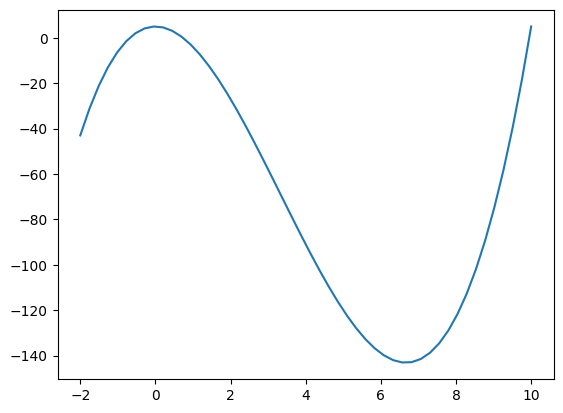

In [3]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

In [4]:
data = simple_newton(func0, dfunc0, 8) # случай 1
dxs8_simp = data[2]
print('sol = ', data[0])
print('iter = ', data[1])
#data = simple_newton(func0, dfunc0, 0.7) # случай 2
#data = simple_newton(func0, dfunc0, 0.0) # случай 3
#print('sol = ', data[0])
#print('iter = ', data[1])

data1 = cool_newton(func0, dfunc0, 8) # случай 1
print('sol = ', data1[0])
print('iter = ', data1[1])
dxs8 = data1[2]
data1 = cool_newton(func0, dfunc0, 0.7) # случай 2
data1 = cool_newton(func0, dfunc0, 0.0) # случай 3
dxs0 = data1[2]
print('sol = ', data1[0])
print('iter = ', data1[1])


sol =  9.949491057914388
iter =  7
sol =  9.949491057914386
iter =  7
sol =  0.7346035077893032
iter =  7


# Объяснение

$f(x) = x^3 - 10x^2 + 5, f'(x) = 3x^2 - 20x$

Точки:

$f'(x) = 0, x \in \{0, \frac{20}{3}\}$

Корни:

$\alpha_1 \approx -0.684, \alpha_2 \approx 0.735, \alpha_3 \approx 9.949$

Метод Ньютона сходится к тому корню, в чью меньшую окрестность(макс./мин.) попало начальное приближение $x$.

## Случай 1:

Точка находится правее минимума $\frac{20}{3}$. Здесь $f$ возросла и уходит в $\infty$ поэтому касательные идут вправо в окр. правого корня $\alpha_3$. Итерации устойчивы и дают квадратичную сходимость к $\alpha_3$

## Случай 2:

Точка лежит между максимумом $x = 0$ и минимумом $\frac{20}{3}$ где функция убывает от 5 до -143. Это окрестность корня $\alpha_2$. Касательные направляют к ближайшему нулю слева, и метод опять сходится квадратично, но уже к другому корню.

## Случай 3:

$f(0) = 5, f'(0) = 0$ 
Формула шага Ньютона требует делить на $f'(0)$ поэтому возникает ZeroDivisionError - деление на 0.

Касательная там горизонтальна и не пересекает ось x (на бесконечности), потому классический шаг не определён.

# График порядка сходимости

$p_k = \frac{ln(\frac{|\Delta x_{k+1}|}{|\Delta x_{k}|})}{ln(\frac{|\Delta x_{k}|}{|\Delta x_{k-1}|})}$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def observed_order_from_dxs(dxs, *, 
                            warmup=0,           # можно пропустить первые warmup шагов
                            tol_log=1e-8,       # порог для |log(b)| и |log(a)| (когда b≈1 или a≈1)
                            clip_range=(0.0, 4.0)):  # выбросы вне диапазона игнорируем
    """
    Устойчивая оценка порядка p_k по шагам dxs (dxs[k] = |dx_k|).
    Возвращает массивы (iters, pks). Точки строятся на итерации k (шаг dxs[k]).
    Фильтруются:
      - пары с отношением ~1 (логарифм почти 0 -> численно неустойчиво),
      - выбросы
    """
    d = np.asarray(dxs, float)

    # 1) убрать нули и нефинитные значения
    mask = np.isfinite(d) & (d > 0)
    d = d[mask]
    if len(d) < 3:
        return np.array([]), np.array([])

    its, pks = [], []
    start = max(2 + warmup, 2)
    for k in range(start, len(d)):
        a = d[k]   / d[k-1]   # для числителя: ln(a)
        b = d[k-1] / d[k-2]   # для знаменателя: ln(b)

        if not (np.isfinite(a) and np.isfinite(b)): 
            continue
        if a <= 0 or b <= 0:
            continue

        La = np.log(a)
        Lb = np.log(b)

        # 2) отбрасываем «почти единичные» отношения (логарифм ~ 0)
        if abs(Lb) < tol_log or abs(La) < tol_log:
            continue

        pk = La / Lb

        # 3) мягкая защита от выбросов (шумные оценки m̂ при Шрёдере)
        if clip_range is not None:
            lo, hi = clip_range
            if not (lo <= pk <= hi):
                continue

        its.append(k)   # точка относится к шагу d_k (итерация k)
        pks.append(pk)

    return np.array(its), np.array(pks)

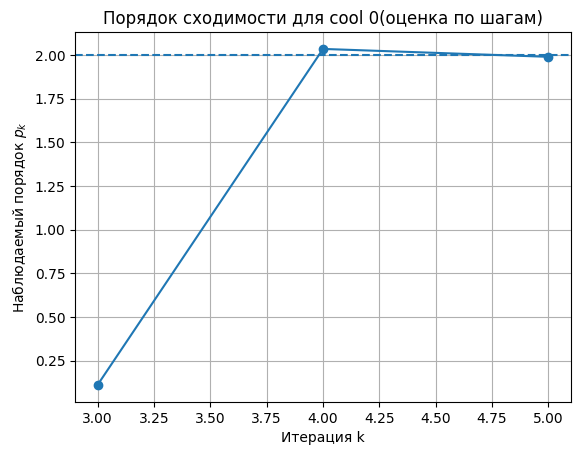

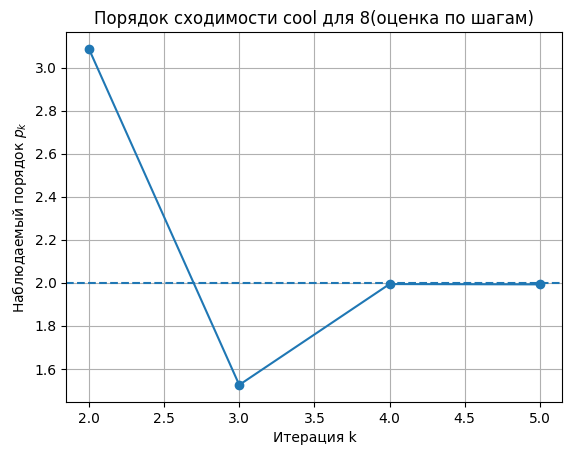

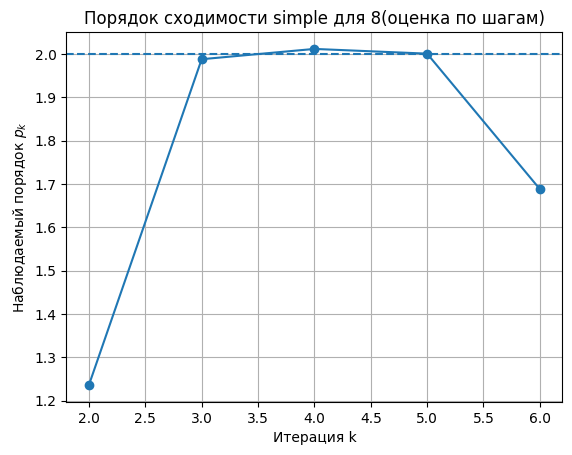

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# График для 0
its, pks = observed_order_from_dxs(dxs0)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости для cool 0(оценка по шагам)")
plt.grid(True)
plt.show()
# График для 8
its, pks = observed_order_from_dxs(dxs8)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости cool для 8(оценка по шагам)")
plt.grid(True)
plt.show()
# График для 8
its, pks = observed_order_from_dxs(dxs8_simp)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости simple для 8(оценка по шагам)")
plt.grid(True)
plt.show()

# Объяснение графика для 0

В начале $f'(x)$ нулевая или крайне мала. Поэтому мы заменяем шаг Ньютона и вместо деления на прозводную смещаем на минимальный сдвиг $\Delta x_k = h, x = x + k$

Поэтому

$|\Delta x_{k+1}| \approx r\cdot |\Delta x_{k}|$ и тогда $p_k = \frac{ln(r)}{ln(r)} = 1$

При выходе спустя n итераций мы выходим с плоского участка и попадаем в нормальную окрестность корня $\alpha_2$

Итерация становится ньютоновской 

$|\Delta x_{k+1}| \approx C \cdot |\Delta x_{k}|^2$ и мы получаем в конце 2 порядок сходимости

# Объяснение графика для 8 и simp0

Первые шаги просто ещё не вошли в квадратичный режим

Добавляется ещё шум в оценке кратности $\mu$ считается по конечным разностям и вдали от корня часто неточна, поэтому первые шаги - неньютоновсие и не $p_k \neq 2$

Последняя точка «плохая», потому что это численный хвост: шаги уже сравнимы с $tol$. Соседние шаги становятся почти одинаковыми и $ln \approx 0$ и $p_k = \frac{ln}{ln}$ - прыгает и ($|\Delta x_{k-1}|, |\Delta x_{k}|, |\Delta x_{k+1}|$) уже не отражает реальную асимптотику

#### Нелинейное уравнение 2

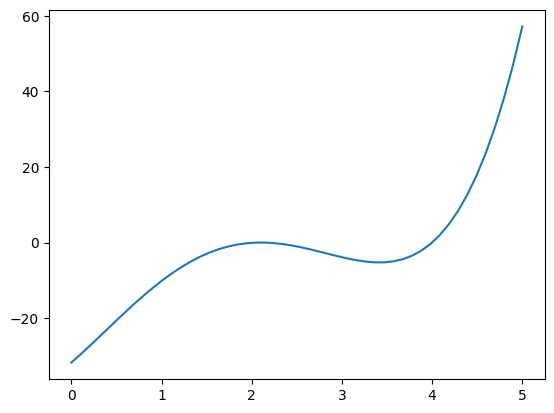

In [7]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

In [8]:
data = simple_newton(func1, dfunc1, 2.0)
dxs2_simp = data[2]
print('sol = ', data[0])
print('iter = ', data[1])
data = cool_newton(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])
dxs2_cool = data[2]

sol =  2.0999999786199406
iter =  23
sol =  2.100000141587336
iter =  3


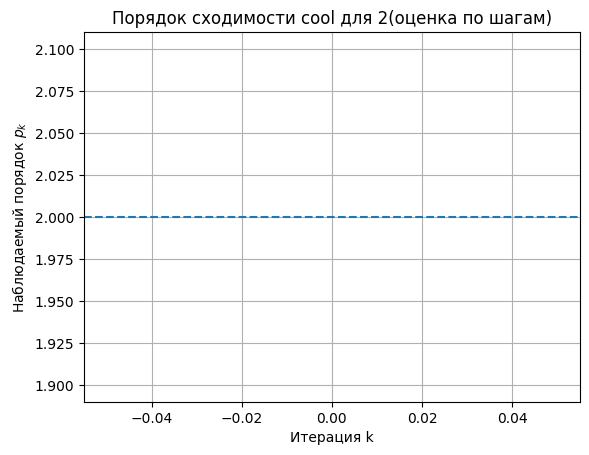

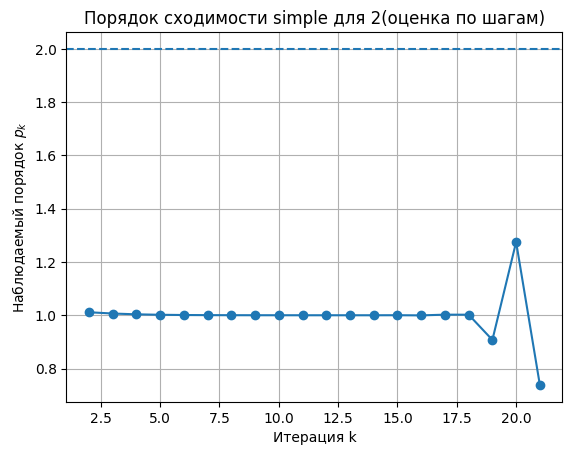

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# График для 2
its, pks = observed_order_from_dxs(dxs2_cool)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости cool для 2(оценка по шагам)")
plt.grid(True)
plt.show()
# График для 2
its, pks = observed_order_from_dxs(dxs2_simp)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости simple для 2(оценка по шагам)")
plt.grid(True)
plt.show()

# Обяъснение

Для simple функции получаем линейную сходиомсть($p_k \approx 1$), т.к. 

$f(x) = (x - x^{*})^m \cdot g(x), e_{k+1} = \frac{m-1}{m}e_k + o(e_k^2)$

В концу шаги $dx_k$ почти равны и из-за этого видна нестабильность

Для cool функции, в случае вычисления $\mu = \frac{f f''}{(f')^2}$, очень быстро уменьшаются шаги и $dx_k$ приближается к машинной точности, из-за чего отношения для построения либо равно 1(ln\ln), либо шум.
Получается слишком хороший алгоритм(3 итерации)

#### Нелинейное уравнение 3

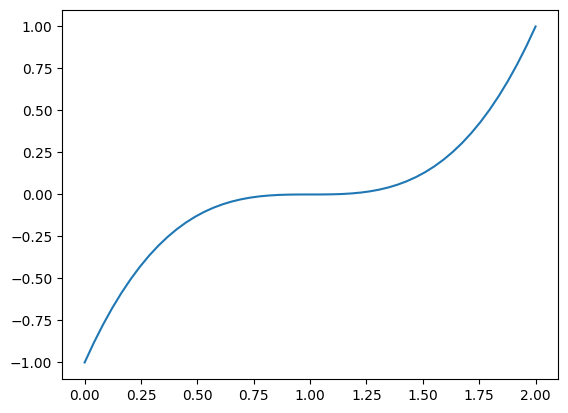

In [10]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [11]:
data = simple_newton(func2, dfunc2, 1.0000001)
dxs_simp = data[2]
print('sol = ', data[0])
print('iter = ', data[1])
data = cool_newton(func2, dfunc2, 1.7)
dxs = data[2]
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0000000000017601
iter =  27
sol =  0.999999995185783
iter =  2


# Объяснение
Порядок сходимости метода simple линейный для случая кратного корня. Это приводит к очень большому числу итераций при небольшом отклонении при выборе нач. приближения.

В cool подбирается $\mu$ коэффициент решающий эту проблему и возвращающий квадратичную сходимость

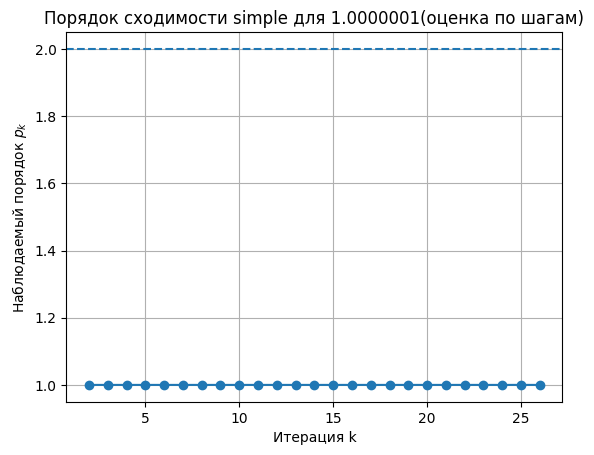

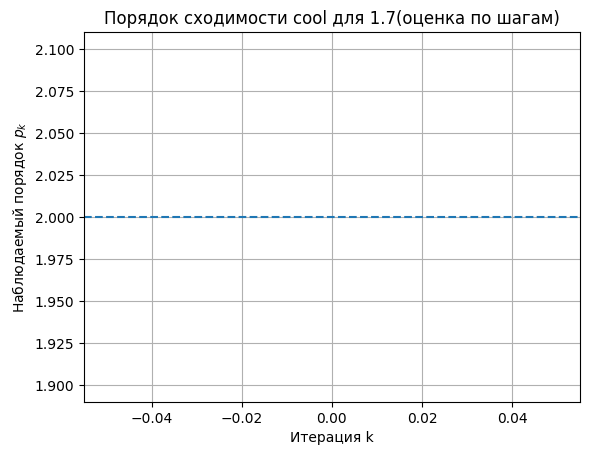

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# График для 2
its, pks = observed_order_from_dxs(dxs_simp)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости simple для 1.0000001(оценка по шагам)")
plt.grid(True)
plt.show()
# График для 2
its, pks = observed_order_from_dxs(dxs)
plt.figure()
plt.plot(its, pks, marker='o')
plt.axhline(2.0, linestyle='--')  # ориентир для квадратичной сходимости
plt.xlabel("Итерация k")
plt.ylabel(r"Наблюдаемый порядок $p_k$")
plt.title("Порядок сходимости cool для 1.7(оценка по шагам)")
plt.grid(True)
plt.show()

Итераций не хватает чтобы полчуить $p_k$, для него нужны корректные $|\Delta x_{k-1}|, |\Delta x_{k}|, |\Delta x_{k+1}|$

Для случая simple - порядок 1 что подтверждается теорией

#### Нелинейное уравнение 4

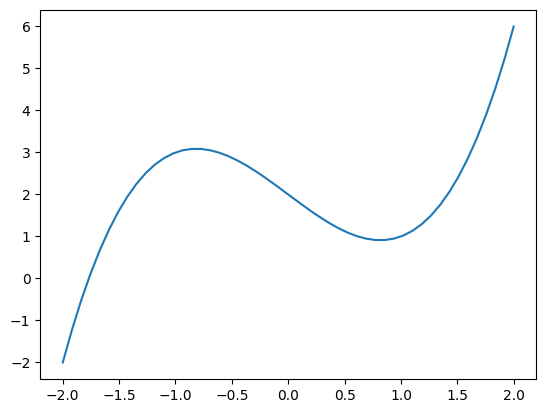

In [13]:
x = np.linspace(-2,2)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [14]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
#data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  10
